In [1]:
##Adult Data set###

In [2]:
#Downloaded and saved the data locally 

In [3]:
#importing necessary libraries to manipulate,process data and create visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#loaded the data in jupyter and added the column names to the data table
df=pd.read_csv('adult.data')
Frame=pd. DataFrame(df. values, columns = ["No","Age", "Workclass", "fnlwgt", "Education","Years_of_Education","Marital_Status","Occupation","Relationship","Race","Sex","Capital_gain","Capital_loss","hours_per_week","Native_country","Earning"])
Frame. to_csv('df')

In [5]:
#checking the data types of the data and also checking all data types are right
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          32560 non-null  int64 
 1   Age                 32560 non-null  int64 
 2   Workclass           32560 non-null  object
 3   fnlwgt              32560 non-null  int64 
 4   Education           32560 non-null  object
 5   Years_of_Education  32560 non-null  int64 
 6   Marital_Status      32560 non-null  object
 7   Occupation          32560 non-null  object
 8   Relationship        32560 non-null  object
 9   Race                32560 non-null  object
 10  Sex                 32560 non-null  object
 11  Capital_gain        32560 non-null  int64 
 12  Capital_loss        32560 non-null  int64 
 13  hours_per_week      32560 non-null  int64 
 14  Native_country      32560 non-null  object
 15  Earning             32560 non-null  object
dtypes: int64(7), object(9)

In [6]:
#printing first 5 values to understand data
print(df.head())

   Unnamed: 0  Age          Workclass  fnlwgt   Education  Years_of_Education  \
0           0   50   Self-emp-not-inc   83311   Bachelors                  13   
1           1   38            Private  215646     HS-grad                   9   
2           2   53            Private  234721        11th                   7   
3           3   28            Private  338409   Bachelors                  13   
4           4   37            Private  284582     Masters                  14   

        Marital_Status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  hours_p

In [7]:
#printing the basic info statistic details to study them, compare mean median and percentiles and check for outliers
df.describe()

,Unnamed: 0,Age,fnlwgt,Years_of_Education,Capital_gain,Capital_loss,hours_per_week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,16279.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8139.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,16279.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,24419.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,32559.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#looking for null or empty values in the data set
df.isnull().sum()

Unnamed: 0            0
Age                   0
Workclass             0
fnlwgt                0
Education             0
Years_of_Education    0
Marital_Status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain          0
Capital_loss          0
hours_per_week        0
Native_country        0
Earning               0
dtype: int64

In [9]:
#when age statistic deatils been studied since mean and 75th percentile where quite near but max remained too far, seemed to have outlier, hence they are removed
a_Q1 = df.Age.quantile(0.25)
a_Q3 = df.Age.quantile(0.75)
a_IQR = a_Q3 - a_Q1
a_lower_limit = a_Q1 - 1.5*a_IQR
a_upper_limit = a_Q3 + 1.5*a_IQR
df = df[(df.Age>a_lower_limit)&(df.Age<a_upper_limit)]
df.Age.describe()

count    32394.000000
mean        38.353461
std         13.292934
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         77.000000
Name: Age, dtype: float64

In [10]:
#when hours_per_week statistic deatils been studied since mean and 75th percentile where quite near but max remained too far, seemed to have outlier, hence they are removed
h_Q1 = df.hours_per_week.quantile(0.25)
h_Q3 = df.hours_per_week.quantile(0.75)
h_IQR = h_Q3 - h_Q1
h_lower_limit = h_Q1 - 1.5*h_IQR
h_upper_limit = h_Q3 + 1.5*h_IQR
df = df[(df.hours_per_week>h_lower_limit)&(df.hours_per_week<h_upper_limit)]
df.hours_per_week.describe()

count    23490.000000
mean        41.568412
std          4.014812
min         33.000000
25%         40.000000
50%         40.000000
75%         42.000000
max         52.000000
Name: hours_per_week, dtype: float64

<AxesSubplot:xlabel='Earning', ylabel='count'>

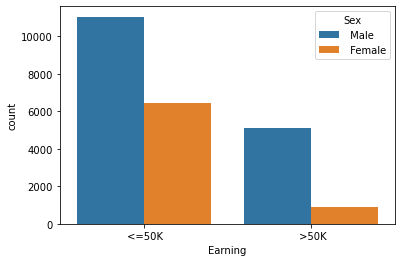

In [11]:
#comparing the ultimate result value "Earning" with other all columns to get an idea about the values:
#used only count plots and hist plots, since the values are categorical and involves only one data, the count
sns.countplot(x="Earning",hue='Sex',data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

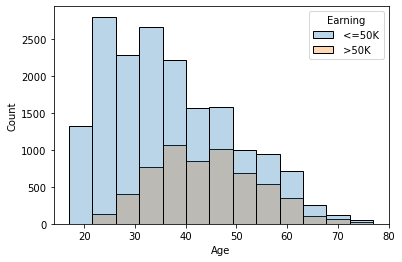

In [12]:
sns.histplot(x='Age',hue="Earning",data=df,bins=13,alpha=0.3)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

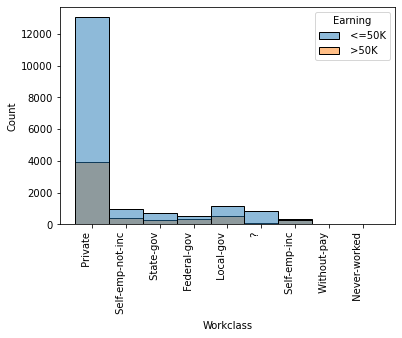

In [13]:
sns.histplot(x='Workclass',hue="Earning",data=df)
plt.xticks(rotation = 90, ha = 'right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

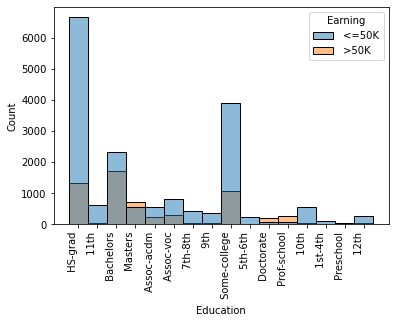

In [14]:
sns.histplot(x='Education',hue="Earning",data=df)
plt.xticks(rotation = 90, ha = 'right')

<AxesSubplot:xlabel='Years_of_Education', ylabel='Count'>

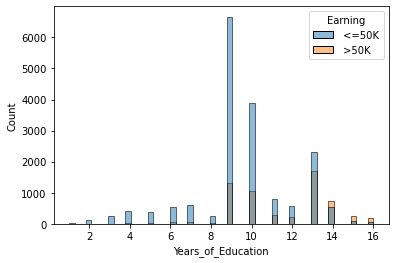

In [15]:
sns.histplot(x='Years_of_Education',hue="Earning",data=df)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Divorced'),
  Text(1, 0, ' Married-civ-spouse'),
  Text(2, 0, ' Never-married'),
  Text(3, 0, ' Separated'),
  Text(4, 0, ' Married-spouse-absent'),
  Text(5, 0, ' Widowed'),
  Text(6, 0, ' Married-AF-spouse')])

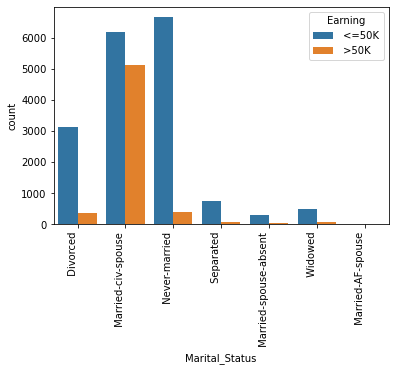

In [16]:
sns.countplot(x='Marital_Status',hue="Earning",data=df)
plt.xticks(rotation = 90, ha = 'right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Handlers-cleaners'),
  Text(1, 0, ' Prof-specialty'),
  Text(2, 0, ' Exec-managerial'),
  Text(3, 0, ' Sales'),
  Text(4, 0, ' Craft-repair'),
  Text(5, 0, ' Transport-moving'),
  Text(6, 0, ' Farming-fishing'),
  Text(7, 0, ' Machine-op-inspct'),
  Text(8, 0, ' Tech-support'),
  Text(9, 0, ' Protective-serv'),
  Text(10, 0, ' Adm-clerical'),
  Text(11, 0, ' Other-service'),
  Text(12, 0, ' ?'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

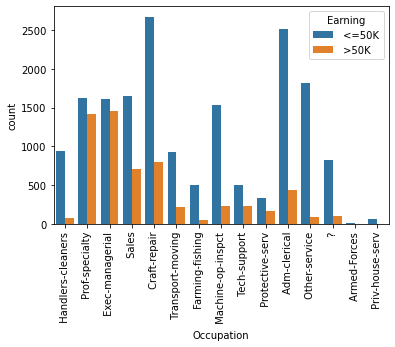

In [17]:
sns.countplot(x='Occupation',hue="Earning",data=df)
plt.xticks(rotation = 90)

(array([30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. , 52.5, 55. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

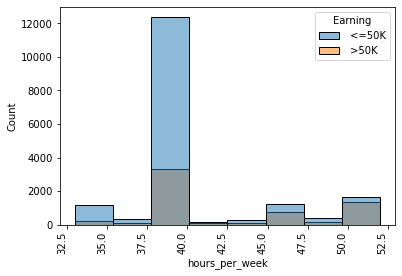

In [18]:
sns.histplot(x='hours_per_week',hue="Earning",data=df,bins=8)
plt.xticks(rotation = 90, ha = 'right')

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

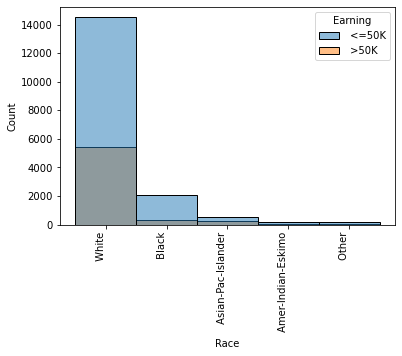

In [19]:
sns.histplot(x='Race',hue="Earning",data=df)
plt.xticks(rotation = 90, ha = 'right')

<AxesSubplot:>

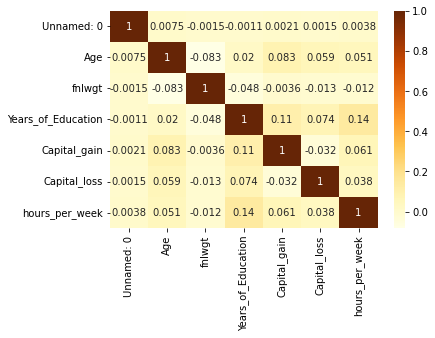

In [20]:
#creating a correlation table to study the correaltion between various data and how it has an impact over the Earnings:
sns.heatmap(df.corr(),annot=True,cmap='YlOrBr')

In [21]:
#importing sklearn libraries, that is used for models
from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
#printing data types for creating model
print(df.dtypes)

Unnamed: 0             int64
Age                    int64
Workclass             object
fnlwgt                 int64
Education             object
Years_of_Education     int64
Marital_Status        object
Occupation            object
Relationship          object
Race                  object
Sex                   object
Capital_gain           int64
Capital_loss           int64
hours_per_week         int64
Native_country        object
Earning               object
dtype: object


In [23]:
#seperating categorical data
df_cat = list(df.select_dtypes(include=['object']).columns)
print(df_cat)

['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Earning']


In [24]:
#seperating numerical values and data
df_num = list(df.select_dtypes(include=['int64']).columns)
print(df_num)

['Unnamed: 0', 'Age', 'fnlwgt', 'Years_of_Education', 'Capital_gain', 'Capital_loss', 'hours_per_week']


In [25]:
#converting all data to int or binary data type to create models
le = preprocessing.LabelEncoder()
for i in df_cat:
    df[i] = le.fit_transform(df[i])
print(df.dtypes)

Unnamed: 0            int64
Age                   int64
Workclass             int32
fnlwgt                int64
Education             int32
Years_of_Education    int64
Marital_Status        int32
Occupation            int32
Relationship          int32
Race                  int32
Sex                   int32
Capital_gain          int64
Capital_loss          int64
hours_per_week        int64
Native_country        int32
Earning               int32
dtype: object


In [26]:
#creating X and Y values for creating models:
X= df.drop(['Earning'],axis = 1)
Y = df['Earning']
print(X)
print(Y)

       Unnamed: 0  Age  Workclass  fnlwgt  Education  Years_of_Education  \
1               1   38          4  215646         11                   9   
2               2   53          4  234721          1                   7   
3               3   28          4  338409          9                  13   
4               4   37          4  284582         12                  14   
6               6   52          6  209642         11                   9   
...           ...  ...        ...     ...        ...                 ...   
32554       32554   22          4  310152         15                  10   
32555       32555   27          4  257302          7                  12   
32556       32556   40          4  154374         11                   9   
32557       32557   58          4  151910         11                   9   
32559       32559   52          5  287927         11                   9   

       Marital_Status  Occupation  Relationship  Race  Sex  Capital_gain  \
1          

In [27]:
#creating a train test split of 20-80 proportion to train the data for model creation:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

In [28]:
#checking the split occured by printing the shape:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(18792, 15) (18792,) (4698, 15) (4698,)


In [29]:
#standardizing the data:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
#creating a logistic regression model:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(x_train, y_train)
log_pred = log.predict(x_test)
ac_log = round(accuracy_score(y_test, log_pred)*100,2)
cm_log = confusion_matrix(y_test, log_pred)

In [31]:
#creating a Knn model and used trail and error for choosing the n_neighbors value:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
ac_knn = round(accuracy_score(y_test, knn_pred)*100,2)
cm_knn = confusion_matrix(y_test, knn_pred)
print(ac_knn)

79.93


In [32]:
#creating a sgd model:

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)
ac_sgd = round(accuracy_score(y_test, sgd_pred)*100,2)
cm_sgd = confusion_matrix(y_test, sgd_pred)
print(ac_sgd)

79.14


In [33]:
#creating a Decision tree model:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(x_train,y_train)
dct_pred = dct.predict(x_test)
ac_dct = round(accuracy_score(y_test, dct_pred)*100,2)
cm_dct = confusion_matrix(y_test, dct_pred)
print(ac_dct)

79.76


In [34]:
#creating a Random Forest model:
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier()
rd.fit(x_train,y_train)
rd_pred = rd.predict(x_test)
ac_rd = round(accuracy_score(y_test, rd_pred)*100,2)
cm_rd = confusion_matrix(y_test, rd_pred)
print(ac_rd)

84.76


In [35]:
#printing the data along with confusion matrix to choose the model that has the maximum accuracy:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Stochastic Gradient Decent','Decision Tree','Random Forest',  
              'KNN'],
    'Accuracy': [ac_log,ac_sgd,ac_dct,ac_rd,ac_knn],
    'Confusion_Matrix':[cm_log,cm_sgd,cm_dct,cm_rd,cm_knn]})                
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(5)

,Accuracy,Confusion_Matrix
Model,,
Random Forest,84.76,"[[3196, 247], [469, 786]]"
Logistic Regression,81.61,"[[3236, 207], [657, 598]]"
KNN,79.93,"[[3044, 399], [544, 711]]"
Decision Tree,79.76,"[[2958, 485], [466, 789]]"
Stochastic Gradient Decent,79.14,"[[3262, 181], [799, 456]]"


In [36]:
#the model suggests like Random Forest is more accurate than other models for this data.